In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import librosa
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

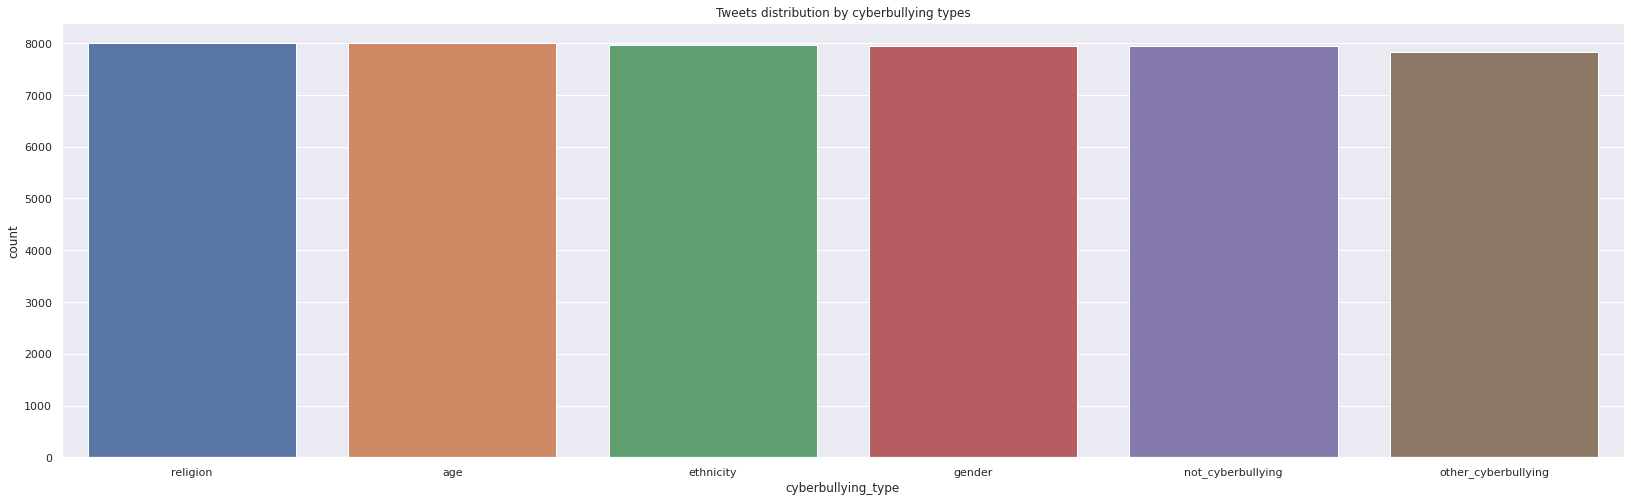

In [2]:
df = pd.read_csv("categorical_data.csv")
df = df.drop_duplicates()
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

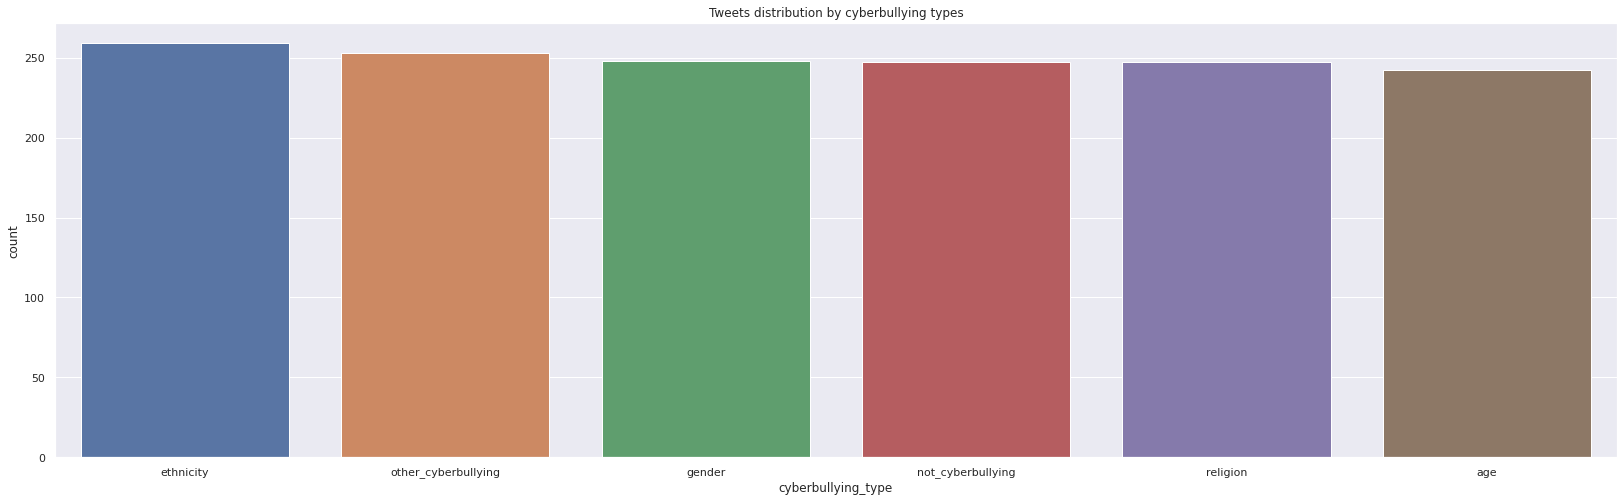

In [3]:
classes=list(df["cyberbullying_type"].unique())
df_list=[]

flux=700-800+800
for i in range(len(classes)):
    sub_df=df[df["cyberbullying_type"]==classes[i]]
    #drop first 7000 rows of sub_df
    if (classes[i]=="other_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:6870+flux])
    elif (classes[i]=="religion"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])
    elif (classes[i]=="age"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux]) 
    elif (classes[i]=="not_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:7000+flux-10])     
    else:
        sub_df=sub_df.drop(sub_df.index[:7000+flux])
    df_list.append(sub_df)


#concatenate all sub_df
df_dropped=pd.concat(df_list,ignore_index=True)
df_drop=df_dropped.reset_index()


df = df_drop
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [4]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
def initial_cleaning(text):
    text = re.sub(r"^RT[\s]+","",text)
    text = text.lower()
    text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    text = re.sub(r'[0-9]',' ',text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return lemmatizer(stem(remove_stopword(initial_cleaning(text))))

df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,index,tweet_text,cyberbullying_type,original_tweet
0,0,fuck fuck mu ch lili allen late video racist a...,not_cyberbullying,"Fuck you, fuck you very very mu~ch, Lily Allen..."
1,1,sinc give fuck scienc go sell advertis cosmet ...,not_cyberbullying,Since when did @Mamamia give a fuck about scie...
2,2,mean bottom heart go fuck,not_cyberbullying,@PeerWorker I mean this from the bottom of my ...
3,3,good morn,not_cyberbullying,Good morning @Carmeldip
4,4,sudden death anni lloyd mayb buy bbq practic n...,not_cyberbullying,"Sudden death for Annie and Lloyd, maybe they w..."
...,...,...,...,...
1491,1491,black ppl expect anyth depend anyth yet free p...,ethnicity,"Black ppl aren't expected to do anything, depe..."
1492,1492,turner withhold disappoint turner call court “...,ethnicity,Turner did not withhold his disappointment. Tu...
1493,1493,swear god dumb nigger bitch get bleach hair re...,ethnicity,I swear to God. This dumb nigger bitch. I have...
1494,1494,yea fuck rt your nigger fuck unfollow fuck dum...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [6]:
from nltk.util import ngrams
text_list=df["tweet_text"].tolist()
omega_text_words = []
n=1


for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

In [7]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.3 MB/s 
     |████████████████████████████████| 5.3 MB 64.6 MB/s 
     |████████████████████████████████| 1.3 MB 58.8 MB/s 
     |████████████████████████████████| 163 kB 68.7 MB/s 
     |████████████████████████████████| 7.6 MB 45.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=47c30931689eec7712380cbbb9db822b8c4c6ef1b6e2af8c923682a5f31cfd89
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [9]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labels=np.array(df["cyberbullying_type"].tolist())
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(6, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [10]:
from numpy import dot
from numpy.linalg import norm


#Our sentences we like to encode
sentences = text_list
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)


In [11]:
from numpy.random.mtrand import random
from sklearn.utils import shuffle
sentences,text_list,embeddings,integer_encoded,onehot_encoded=shuffle(sentences,text_list,embeddings,integer_encoded,onehot_encoded,random_state=0)

In [12]:
#construct over adjency matrix
from sklearn.metrics.pairwise import cosine_similarity
A=cosine_similarity(embeddings, embeddings)
thresh=0.5
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
      if A[i,j]<thresh:
        A[i,j]=0


source=[]
target=[]
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if A[i,j]>0:
            source.append(i)
            target.append(j)



Node_labels=onehot_encoded

edges = {'source': source,
        'target': target}

# Create DataFrame
edges = pd.DataFrame(edges,index=list(np.arange(len(source))))

In [13]:
!pip install stellargraph==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 433 kB 6.3 MB/s 


In [14]:
features_matrix=embeddings

indexer=list(np.arange(features_matrix.shape[0]))

node_features = pd.DataFrame(features_matrix,index=[str(x) for x in indexer])

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
G = sg.StellarGraph(node_features, edges.astype(str))

In [15]:
A_norm=A

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


target = {'0': Node_labels[:,0],'1': Node_labels[:,1],'2': Node_labels[:,2],'3': Node_labels[:,3],'4': Node_labels[:,4],'5': Node_labels[:,5]}
  
# Create DataFrame
targets = pd.DataFrame(target,index=list(np.arange(len(Node_labels))))

indexy=np.arange(len(Node_labels))

train_pages, test_pages,indexy_train,indexy_test = train_test_split(targets,indexy ,train_size=int(0.8*len(targets)))
val_pages, test_pages,indexy_val,indexy_test = train_test_split(test_pages,indexy_test ,train_size=int(0.5*len(test_pages)))

train_targets = train_pages
val_targets = val_pages
test_targets =test_pages


train_idx=list(indexy_train)
val_idx=list(indexy_val)
test_idx=list(indexy_test)

In [16]:
print("Orignal Targets Length: ",len(targets))
print("Train Target Length: ",len(train_targets))
print("Validation Target Length: ",len(val_targets))
print("Test Target Length: ",len(test_targets))

Orignal Targets Length:  1496
Train Target Length:  1196
Validation Target Length:  150
Test Target Length:  150


In [17]:
# Define the function to get these indices
def get_node_indices(G, ids):
    # find the indices of the nodes
    node_ids = np.asarray(ids)
    flat_node_ids = list(node_ids.reshape(-1))
    flat_node_ids=[str(x) for x in flat_node_ids]


    flat_node_indices = G.node_ids_to_ilocs(flat_node_ids) # in-built function makes it really easy
    # back to the original shape
    node_indices = flat_node_indices.reshape(1, len(node_ids)) # add 1 extra dimension
    
    return node_indices

train_indices = get_node_indices(G, train_pages.index)
val_indices = get_node_indices(G, val_pages.index)
test_indices = get_node_indices(G, test_pages.index)




# Expand dimensions
features_input = np.expand_dims(features_matrix, 0)
A_input = np.expand_dims(A_norm, 0)

y_train = np.expand_dims(train_targets, 0)
y_val = np.expand_dims(val_targets, 0)
y_test = np.expand_dims(test_targets, 0)



In [18]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import activations, initializers, constraints, regularizers
from tensorflow.keras.layers import Input, Layer, Lambda, Dropout, Reshape, Dense
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import layers, optimizers, losses, metrics, Model



from stellargraph.layer.gcn import GraphConvolution, GatherIndices


# Initialise GCN parameters
kernel_initializer="glorot_uniform"
bias = True
bias_initializer="zeros"
n_layers = 2

n_features = features_input.shape[2]
n_nodes = features_input.shape[1]


x_features = Input(batch_shape=(1, n_nodes, n_features))
x_indices = Input(batch_shape=(1, None), dtype="int32")
x_adjacency = Input(batch_shape=(1, n_nodes, n_nodes))
x_inp = [x_features, x_indices, x_adjacency]
x_inp

# Build the model
x = (x_features)
x = GraphConvolution(32, activation='relu', 
                     use_bias=True,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer)([x, x_adjacency])
x = Dropout(0.5)(x)
x = GraphConvolution(32, activation='relu', 
                     use_bias=True,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer)([x, x_adjacency])

x = GatherIndices(batch_dims=1)([x, x_indices])
output = Dense(6, activation='softmax')(x)




model = Model(inputs=[x_features, x_indices, x_adjacency], outputs=output)
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 1496, 384)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(1, 1496, 1496)]    0           []                               
                                                                                                  
 graph_convolution (GraphConvol  (1, 1496, 32)       12320       ['input_1[0][0]',                
 ution)                                                           'input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (1, 1496, 32)        0           ['graph_convolution[0][0]']  

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 45.8566 - acc: 0.1664 - val_loss: 26.5026 - val_acc: 0.1733
Epoch 2/50
1/1 [==============================] - 0s 48ms/step - loss: 25.0270 - acc: 0.1538 - val_loss: 9.5562 - val_acc: 0.1733
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 10.0347 - acc: 0.1722 - val_loss: 7.8506 - val_acc: 0.2267
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 7.7377 - acc: 0.2232 - val_loss: 6.0743 - val_acc: 0.3067
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 6.2466 - acc: 0.2634 - val_loss: 4.6087 - val_acc: 0.3667
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 3.8878 - acc: 0.3027 - val_loss: 3.2410 - val_acc: 0.4733
Epoch 7/50
1/1 [==============================] - 0s 44ms/step - loss: 2.9462 - acc: 0.3930 - val_loss: 2.5997 - val_acc: 0.4400
Epoch 8/50
1/1 [==============================] - 0s 79ms/step - loss: 2.2375 - acc: 0.4716 - v

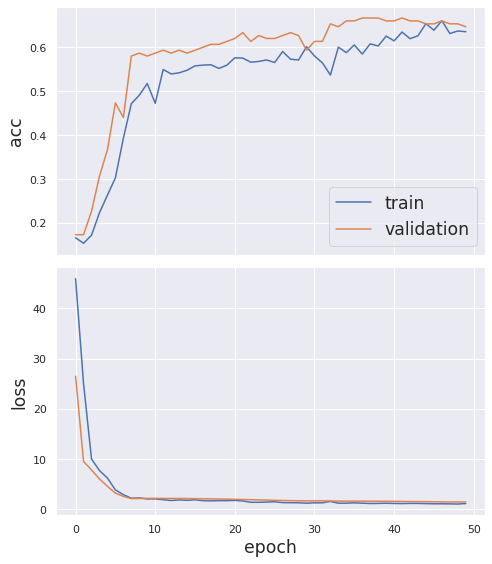

In [19]:


model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

es_callback = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)



history = model.fit(
    x = [features_input, train_indices, A_input],
    y = y_train,
    batch_size = 16,
    epochs=50,
    validation_data=([features_input, val_indices, A_input], y_val),
    verbose=1,
    # shuffle=True,
    # callbacks=[es_callback],
)


sg.utils.plot_history(history)


In [20]:
_, acc = model.evaluate([features_input, test_indices, A_input], y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 0s 25ms/step - loss: 1.5455 - acc: 0.6667
Accuracy =  66.66666865348816 %


1/1 [==============================] - 0s 106ms/step


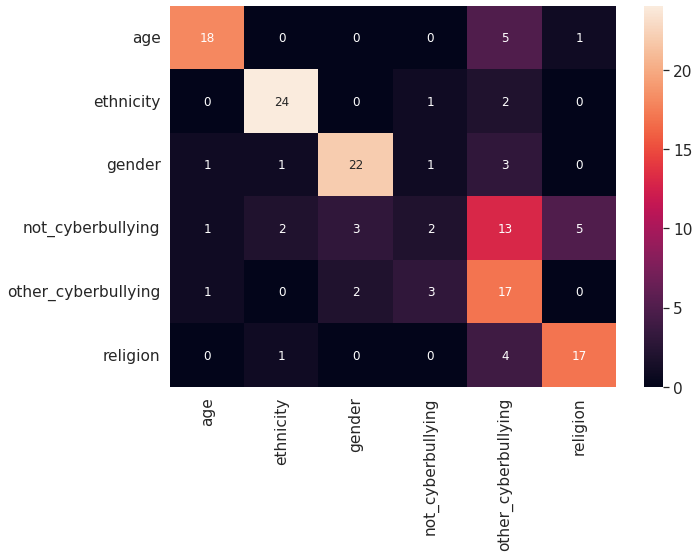

In [21]:
subvert_ytest=np.squeeze(y_test,axis=0)
ref=np.argmax(subvert_ytest,axis=1)
predy=model.predict([features_input, test_indices, A_input])
predy=np.squeeze(predy,axis=0)
predictions=np.argmax(predy,axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ref,predictions)



label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, label_names,label_names)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size

In [23]:
from sklearn.metrics import classification_report

print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8571    0.7500    0.8000        24
           1     0.8571    0.8889    0.8727        27
           2     0.8148    0.7857    0.8000        28
           3     0.2857    0.0769    0.1212        26
           4     0.3864    0.7391    0.5075        23
           5     0.7391    0.7727    0.7556        22

    accuracy                         0.6667       150
   macro avg     0.6567    0.6689    0.6428       150
weighted avg     0.6607    0.6667    0.6441       150

